Robert Steward

CS7641

Various Plots used throughout the report were created in this notebook (coefficient heat map and data summary plots)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("dataSets/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
 df['Age'].isnull().values.sum()

177

In [3]:
del df["PassengerId"]
del df["Name"]
del df["Ticket"]
del df["Cabin"]
df
df=df.dropna()

In [4]:
df['Survived'].value_counts()
288/(424+288)

0.4044943820224719

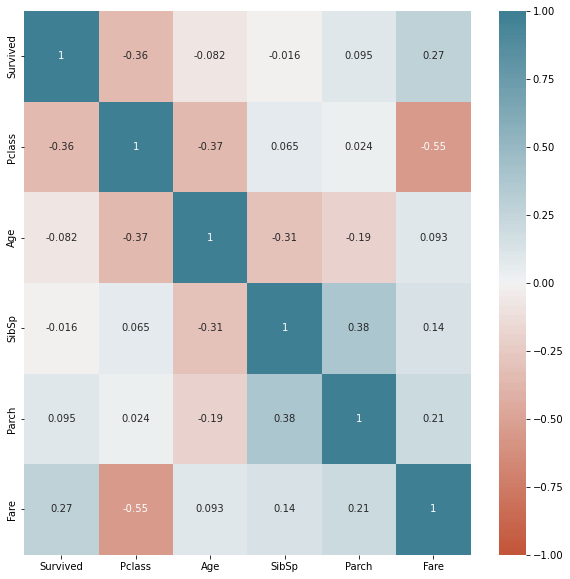

In [5]:
correlation_matrix=df.corr()
correlation_features=correlation_matrix.index
plt.figure(figsize=(10,10))
graph=sns.heatmap(
    df[correlation_features].corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))
    


<AxesSubplot:xlabel='Age', ylabel='Count'>

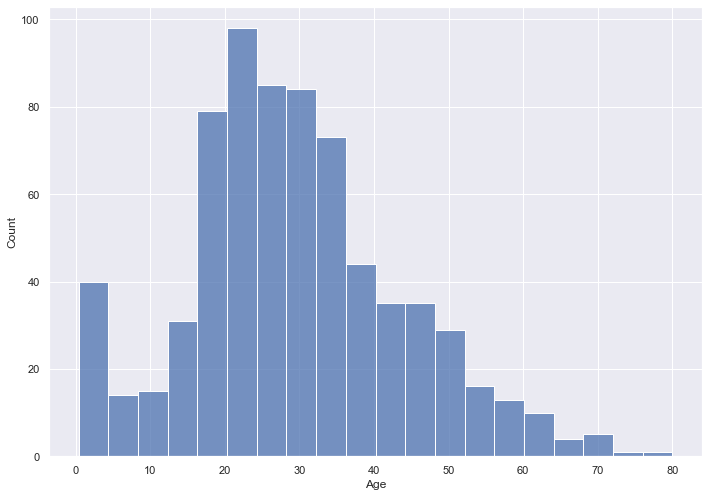

In [7]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)

#sns.scatterplot(x="age bracket",
#                    y="Pclass",
#                    data=df)
#sns.histplot(data=df, x="age bracket")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="Age", bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

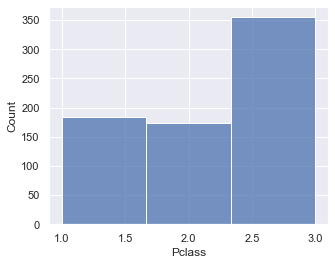

In [8]:
sns.set(rc={'figure.figsize':(5,4)})
sns.histplot(data=df, x="Pclass", bins=3)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

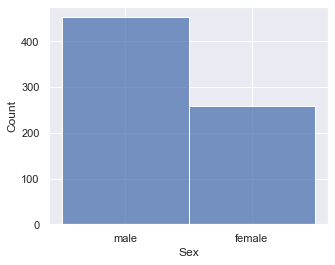

In [9]:
sns.histplot(data=df, x="Sex", bins=2)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

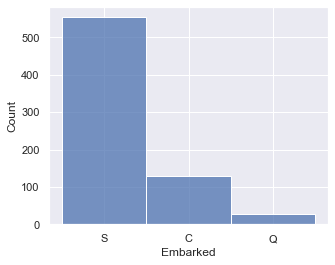

In [10]:
sns.histplot(data=df, x="Embarked", bins=3)  #Cherbourg, Queenstown, Southampton

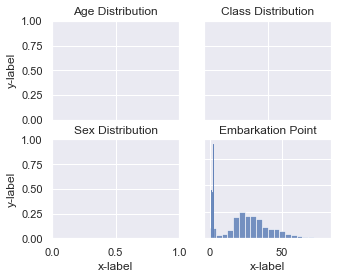

In [11]:

sns.set(rc={'figure.figsize':(5,4)})
fig, axs = plt.subplots(2, 2)
sns.histplot(data=df, x="Age", bins=20)
axs[0, 0].set_title('Age Distribution')
sns.histplot(data=df, x="Pclass", bins=3)
axs[0, 1].set_title('Class Distribution')
sns.histplot(data=df, x="Pclass", bins=3)
axs[1, 0].set_title('Sex Distribution')
sns.histplot(data=df, x="Pclass", bins=3)
axs[1, 1].set_title('Embarkation Point')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [12]:
df.info

<bound method DataFrame.info of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[712 rows x 8 columns]>

In [13]:
#diabetes
import math
df=pd.read_csv("dataSets/diabetes.csv")
df.isnull().values.any()
#print(df[df.Insulin == 0].shape[0])
#print(df[df.SkinThickness == 0].shape[0])
#print(df[df.Glucose == 0].shape[0])
#print(df[df.BloodPressure == 0].shape[0])
#print(df[df.BMI == 0].shape[0])
#print(df[df.DiabetesPedigreeFunction == 0].shape[0])
#print(df[df.Age ==0 ].shape[0])
df['Outcome'].value_counts()
268/(268+500)
df
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


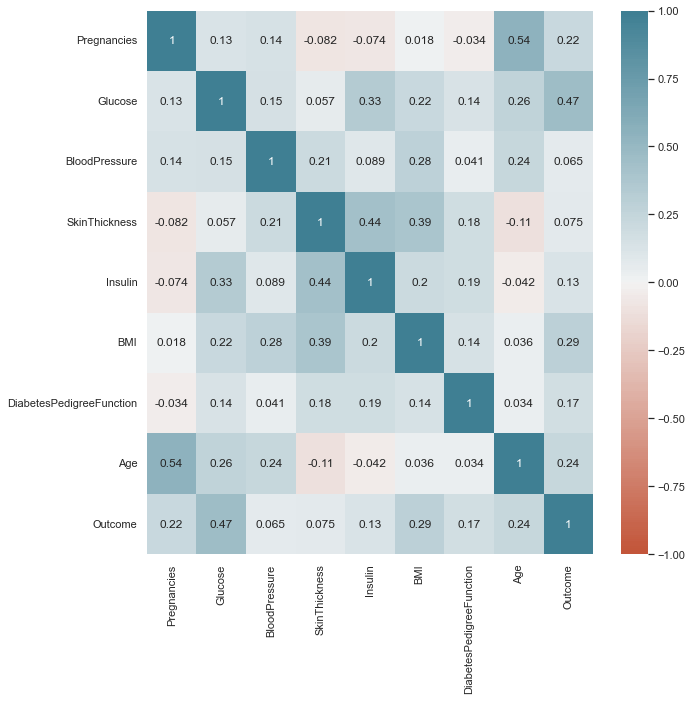

In [14]:
correlation_matrix=df.corr()
correlation_features=correlation_matrix.index
plt.figure(figsize=(10,10))
graph=sns.heatmap(
    df[correlation_features].corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))


In [15]:
df=pd.read_csv("dataSets/diabetes.csv")
zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_to_nan:
             df[col]=df[col].replace(0,np.NaN)
             mean=int(df[col].mean(skipna=True))
             df[col]=df[col].replace(np.NaN,mean)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)                
#X=df.iloc[:,0:8]
#y=df.iloc[:,8]

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


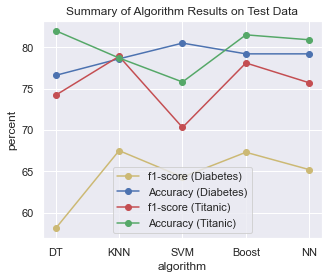

In [17]:
diabetes_f1=[58.1,67.5,64.3,67.3,65.2]
diabetes_acc=[76.6,78.6,80.5,79.2,79.2]
tit_f1=[74.2,78.9,70.3,78.1,75.7]
tit_acc=[82,78.7,75.8,81.5,80.9]

ax=plt.axes()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['DT','KNN','SVM','Boost','NN'])

plt.plot(diabetes_f1,'o-', color="y",
        label="f1-score (Diabetes)")
plt.plot(diabetes_acc, 'o-',color="b",
        label="Accuracy (Diabetes)")
plt.plot(tit_f1, 'o-',color="r",
        label="f1-score (Titanic)")
plt.plot(tit_acc, 'o-',color="g",
        label="Accuracy (Titanic)")
#plt.set_ticks(['DT','KNN','SVM','Boost','NN'])

#plt.grid()
plt.ylabel('percent')
plt.xlabel('algorithm')
plt.title("Summary of Algorithm Results on Test Data")
plt.legend(loc="best")

plt.show()    

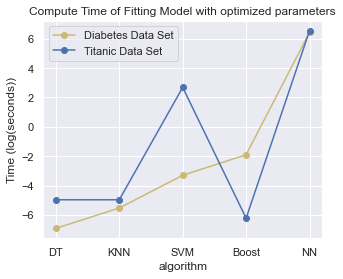

In [18]:
grid_search_dia=[.004,12.4,151.9,4.8]
grid_search_tit=[.81,6.4,341.6,3.7,]
model_fit_dia=[math.log(.001),math.log(.004),math.log(.037),math.log(.15),math.log(621.1)]
model_fit_tit=[math.log(.007),math.log(.007),math.log(14.7),math.log(.002),math.log(695.3)]
ax=plt.axes()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['DT','KNN','SVM','Boost',"NN"])

plt.plot(model_fit_dia,'o-', color="y",
        label="Diabetes Data Set")
plt.plot(model_fit_tit, 'o-',color="b",
        label="Titanic Data Set")
#plt.plot(tit_f1, 'o-',color="r",
#        label="f1-score (Titanic)")
#plt.plot(tit_acc, 'o-',color="g",
#        label="Accuracy (Titanic)")
#plt.set_ticks(['DT','KNN','SVM','Boost','NN'])

#plt.grid()
plt.ylabel('Time (log(seconds))')
plt.xlabel('algorithm')
plt.title("Compute Time of Fitting Model with optimized parameters")
plt.legend(loc="best")

plt.show()    